In [4]:
# Importing All Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [123]:
#Gives to all rows everytime command is run without trancating
pd.set_option('display.max_rows', None)

In [115]:
# to reset the above condition
pd.reset_option('display.max_rows')

# Importing Files

In [397]:
# Importing File application data 
df_ad=pd.read_csv(r'C:\Users\prana\Downloads\application_data.csv')

In [265]:
# Importing file previous application
df=pd.read_csv(r'C:\Users\prana\Downloads\previous_application.csv')

In [266]:
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [269]:
# Information of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [271]:
#### # Descriptive Analysis 
numer= df.describe()
numerical= numer.columns
numer

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [273]:
# Categorical Columns 
categorical = df.select_dtypes(include = object).columns
categorical

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [275]:
# Number of Rows and Columns 
df.shape

(1670214, 37)

In [277]:
# Number of Null Values in Each Column 
df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [279]:
#percentage of missing values
(df.isnull().sum()/len(df.index))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

# Findings :
-Way too many columns have missing data

# OPTIONS:
- Impute values in columns having % of missing values < 40
- Delete columns having more than %40 missing values as they cannot help in analysis.

# Calculating Percentage of Null Values 
null = (df.isnull().sum()/len(df.index))*100 
null1 = null[np.where(null>0)[0]]

In [286]:
# Calculating Percentage of Null Values 
null = (df.isnull().sum()/len(df.index))*100 
null1 = null[np.where(null>0)[0]]

C:\Users\prana\AppData\Local\Temp\ipykernel_16160\3348726020.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  null1 = null[np.where(null>0)[0]]


In [288]:
# Calculating mean of null Percentage 
mean =  np.mean(null1.values)
mean

41.571529157341516

In [290]:
# Dropping Columns with null values > 40% as means was 41% 
drop_columns = null[np.where(null>40)[0]]
df1 = df.drop(drop_columns.index,axis=1)
df1.shape

C:\Users\prana\AppData\Local\Temp\ipykernel_16160\161189611.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  drop_columns = null[np.where(null>40)[0]]


(1670214, 26)

In [292]:
# Percentage of null values in new dataframe 
(df1.isnull().sum()/len(df1.index))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

# TREATING MISSING VALUES (Column wise)

#### COLUMN: [AMT_ANNUITY]

In [296]:
df1["AMT_ANNUITY"].isnull().sum()

372235

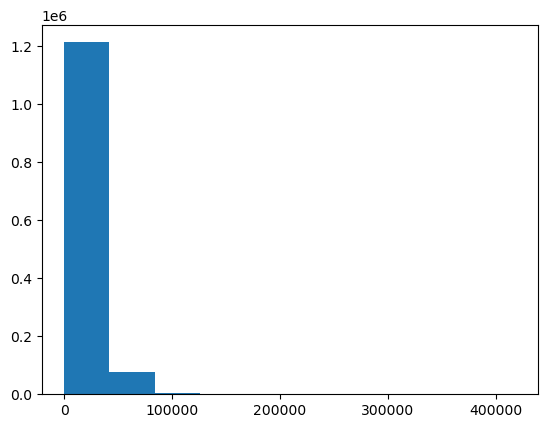

In [298]:
#plotting a histogram to see data visually

plt.hist(df1["AMT_ANNUITY"])
plt.show()

In [300]:
pd.options.display.float_format = "{:.2f}".format  #to display in decimal form
df1["AMT_ANNUITY"].describe()

count   1297979.00
mean      15955.12
std       14782.14
min           0.00
25%        6321.78
50%       11250.00
75%       20658.42
max      418058.15
Name: AMT_ANNUITY, dtype: float64

In [302]:
# Calculating Q1 and Q3 to see where the majority of the data lies 
# Filter non-null values

annuity = df1['AMT_ANNUITY'][df1['AMT_ANNUITY'].notnull()]

In [304]:
# Calculate the 25th percentile (Q1)
Q1 = np.percentile(annuity, 25)
Q1

6321.78

In [306]:
# Calculate the 25th percentile (Q3)
Q3 = np.percentile(annuity,75)
Q3

20658.42

In [308]:
# Filter rows where AMT_ANNUITY is between Q1 and Q3
filtered_df = df1[(df1['AMT_ANNUITY'] > Q1) & (df1['AMT_ANNUITY'] < Q3)]
filtered_df.shape

(648981, 26)

In [310]:
# Finding median of data Between Q1 and Q3 
median = filtered_df['AMT_ANNUITY'].median()

In [312]:
# Using median to impute missing values as mean would skew the data
df1["AMT_ANNUITY"] = df1["AMT_ANNUITY"].fillna(median)

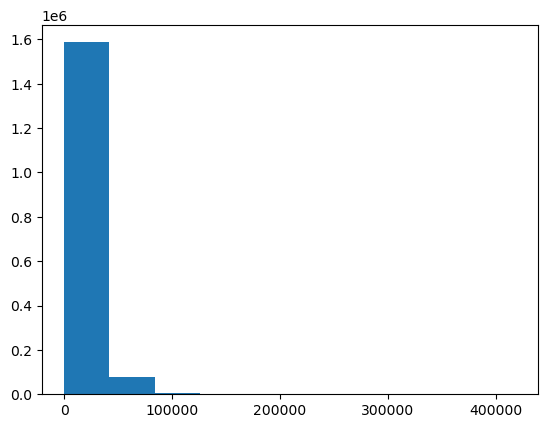

In [316]:
#After imputation
plt.hist(df1["AMT_ANNUITY"])
plt.show()

Y-axis changed from 1.2 to 1.6 after imputing null values with median

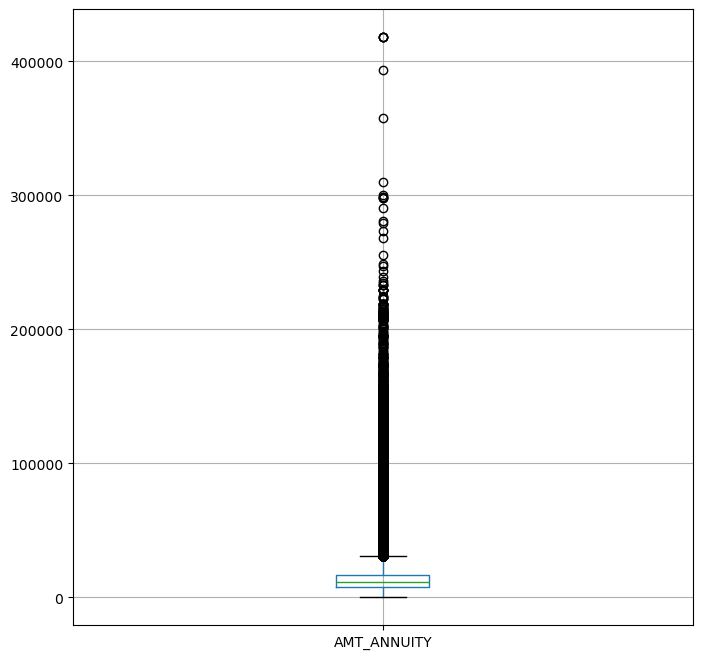

In [319]:
#Checking the spread of the data and also for outliers

df1.boxplot(["AMT_ANNUITY"], figsize=[8,8])
plt.show()

1) Data points seem to be scattered uniformly
2) 
No need to remove/treat outliers (as also seen in the displot, values are mostly continuous)

In [324]:
# verifying there are no null values in AMT_ANNUITY after imputation
df1['AMT_ANNUITY'].isnull().sum() 

0

#### COLUMN: [AMT_GOODS_PRICE]
- 
(Goods price of good that client asked for (if applicable) on the previous application)

In [327]:
df1["AMT_GOODS_PRICE"].describe()

count   1284699.00
mean     227847.28
std      315396.56
min           0.00
25%       50841.00
50%      112320.00
75%      234000.00
max     6905160.00
Name: AMT_GOODS_PRICE, dtype: float64

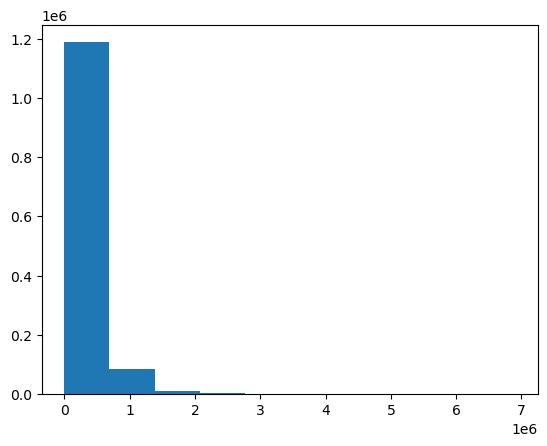

In [329]:
plt.hist(df1["AMT_GOODS_PRICE"])
plt.show()

In [331]:
# Imputing Null Values with Median 
df1["AMT_GOODS_PRICE"] = df1["AMT_GOODS_PRICE"].fillna(df1["AMT_GOODS_PRICE"].median(skipna = True))

In [333]:
# Verifying Null Values are Removed 
df1["AMT_GOODS_PRICE"].isnull().sum()

0

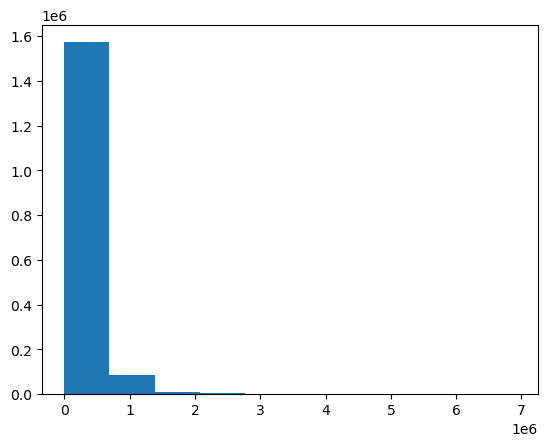

In [335]:
plt.hist(df1["AMT_GOODS_PRICE"])
plt.show()

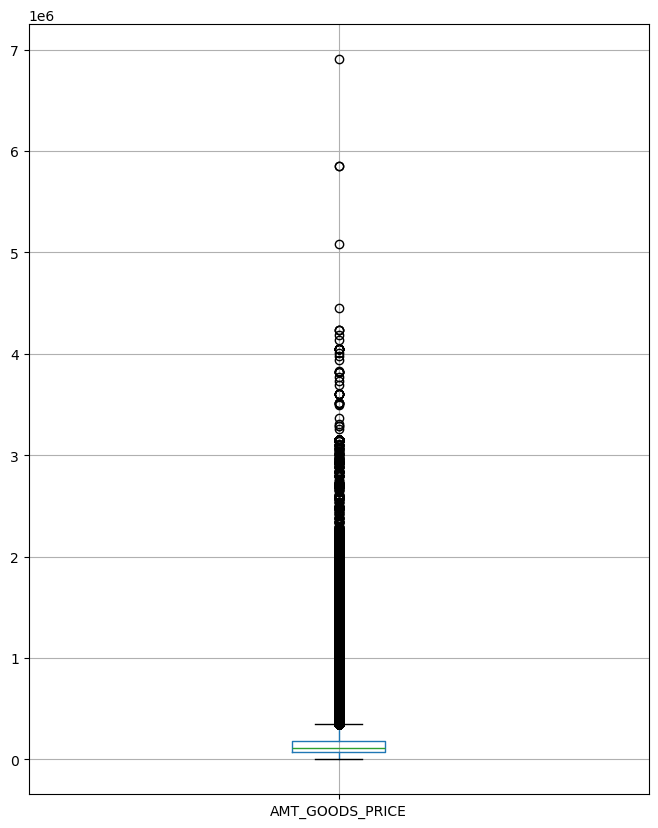

In [337]:
df1.boxplot(["AMT_GOODS_PRICE"], figsize = [8, 10])
plt.show()

AMT_GOODS_PRICE column has significant outliers but utliers can significantly affect the results of fraud detection models 
Therefore no need to handle outliers 

#### COLUMN: [CNT_PAYMENT]
the duration or terms of a previous credit or loan when applying for a new credit or loan.

In [341]:
df1["CNT_PAYMENT"].describe()

count   1297984.00
mean         16.05
std          14.57
min           0.00
25%           6.00
50%          12.00
75%          24.00
max          84.00
Name: CNT_PAYMENT, dtype: float64

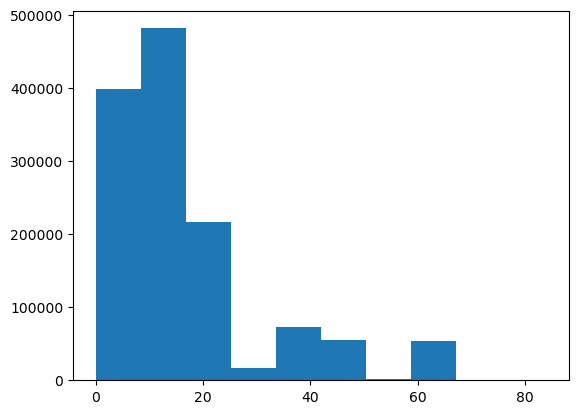

In [343]:
plt.hist(df1["CNT_PAYMENT"])
plt.show()

Majority of the data lie between 0 and 20

In [346]:
# Impute missing values with the mean 
mean = df1["CNT_PAYMENT"].mean()
df1["CNT_PAYMENT"] = df1["CNT_PAYMENT"].fillna(mean)

In [348]:
# Verifying That no Nul Values are Present in CNT_PAYMENT 
df1["CNT_PAYMENT"].isnull().sum()

0

In [350]:
df1.isnull().sum() 

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_ANNUITY                      0
AMT_APPLICATION                  0
AMT_CREDIT                       1
AMT_GOODS_PRICE                  0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
CNT_PAYMENT                      0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

#### COLUMN: [PRODUCT_COMBINATION]
Detailed product combination of the previous applicationn

In [353]:
df1["PRODUCT_COMBINATION"].describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [355]:
# Number of Missing Values 
df1['PRODUCT_COMBINATION'].isnull().sum()

346

In [357]:
# Values OF PRODUCT_COMBINATION cannot be imputed as they are Categorical Data 
df['PRODUCT_COMBINATION'].head()

0    POS mobile with interest
1            Cash X-Sell: low
2           Cash X-Sell: high
3         Cash X-Sell: middle
4           Cash Street: high
Name: PRODUCT_COMBINATION, dtype: object

In [359]:
# Imputing Values with Data Not Available 
df1["PRODUCT_COMBINATION"] = df1["PRODUCT_COMBINATION"].fillna("NOT AVAILABLE")

#### COLUMN: [AMT_CREDIT]
Final credit amount on the previous application.

In [362]:
df1["AMT_CREDIT"].describe()

count   1670213.00
mean     196114.02
std      318574.62
min           0.00
25%       24160.50
50%       80541.00
75%      216418.50
max     6905160.00
Name: AMT_CREDIT, dtype: float64

In [364]:
df1['AMT_CREDIT'].isnull().sum()

1

In [366]:
# Imputing Null value With Median 
median = df1["AMT_CREDIT"].median()
df1["AMT_CREDIT"] = df1["AMT_CREDIT"].fillna(median)

#### Verifying That No Null Values are Present in the Dataset 

In [369]:
df1.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [371]:
# Checking the NAME_CASH_LOAN_PURPOSE column for any unique data,

df1.NAME_CASH_LOAN_PURPOSE.value_counts()

NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                          

In [373]:
# Removing the 'XNA' and 'XAP' column values from the column,

df1 = df1.drop(df1[df1.NAME_CASH_LOAN_PURPOSE=='XNA'].index)
df1 = df1.drop(df1[df1.NAME_CASH_LOAN_PURPOSE=='XAP'].index)

In [375]:
# Rechecking the NAME_CASH_LOAN_PURPOSE for the values.

df1.NAME_CASH_LOAN_PURPOSE.value_counts()

NAME_CASH_LOAN_PURPOSE
Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: count

# Cleaning of Previous Appliocation data has done

# Exploring Application data

In [400]:
# Information of columns 
df_ad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00


In [402]:
#Info of column
df_ad.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [404]:
# Number of Null Values in Each Column 
a=(df_ad.isnull().sum()/len(df_ad.index))*100
a

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F

In [406]:
null=a[np.where(a>40)[0]]

C:\Users\prana\AppData\Local\Temp\ipykernel_16160\3826691547.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  null=a[np.where(a>40)[0]]


In [412]:
applications = df_ad.drop(null.index,axis=1)

In [414]:
applications.shape

(307511, 73)

In [416]:
# Number of Null Values in Each Column 
(applications.isnull().sum()/len(applications.index))*100

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
OCCUPATION_TYPE             

In [418]:
applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00


# Data Cleaning and removing null value

# Column: AMT_GOODS_PRICE

For consumer loans it is the price of the goods for which the loan is given

In [420]:
# Taking out median of AMT_GOODS_PRICE
applications['AMT_GOODS_PRICE'].median()

450000.0

In [422]:
# filling null values with median
applications['AMT_GOODS_PRICE'] = df1['AMT_GOODS_PRICE'].fillna(450000)

In [424]:
# checking if all null values are removed
applications["AMT_GOODS_PRICE"].isnull().sum()

0

# Column: OCCUPATION_TYPE

What kind of occupation does the client have

In [430]:
# given Unknown because Unknown column has highest values
applications['OCCUPATION_TYPE'] = df1['OCCUPATION_TYPE'].fillna('Unknown')

In [432]:
applications['OCCUPATION_TYPE'].isnull().sum()

0

In [435]:
# checking remaining columns with null value

(applications.isnull().sum()/len(applications.index))*100

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.00
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
OCCUPATION_TYPE             

# Column: NAME_TYPE_SUITE

Who was accompanying client when he was applying for the loan
 

In [437]:
# finding number of null values
applications['NAME_TYPE_SUITE'].isnull().sum()

1292

In [439]:
# finding value count
applications["NAME_TYPE_SUITE"].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [441]:
# filling null columns with as Unaccompained
applications["NAME_TYPE_SUITE"] = applications["NAME_TYPE_SUITE"].fillna("Unaccompanied")

In [442]:
#checking if any values is remained null or not
applications['NAME_TYPE_SUITE'].isnull().sum()

0

# Column = AMT_ANNUITY

In [464]:
# finding the number  of null values in AMT_ANNUITY column
applications['AMT_ANNUITY'].isnull().sum()

0

In [466]:
#finding median
applications["AMT_ANNUITY"].median()

24903.0

In [468]:
# there are only 12 null values so we are directly filling null values with median
applications["AMT_ANNUITY"] = df1["AMT_ANNUITY"].fillna(24903.0)

In [470]:
applications['AMT_ANNUITY'].isnull().sum()

0

In [ ]:
#This columns are worthless in analysis
applications.drop([
    "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", 
    "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "FLAG_EMAIL", 
    "DAYS_LAST_PHONE_CHANGE", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", 
    "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", 
    "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", 
    "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", 
    "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", 
    "FLAG_DOCUMENT_21", "EXT_SOURCE_2", "EXT_SOURCE_3"
], axis=1, inplace=True)

In [474]:
#taking out info about remaining columns
applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [476]:
applications.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    2
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
L

In [481]:
(applications.isnull().sum()/len(applications.index))*100

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.00
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OCCUPATION_TYPE                0.00
CNT_FAM_MEMBERS                0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
REG_REGION_NOT_LIVE_REGION     0.00
REG_REGION_NOT_WORK_REGION     0.00
LIVE_REGION_NOT_WORK_REGION 

# Columns = 
    OBS_30_CNT_SOCIAL_CIRCLE, 
    DEF_30_CNT_SOCIAL_CIRCLE, 
    DEF_60_CNT_SOCIAL_CIRCLE,
    OBS_60_CNT_SOCIAL_CIRCLE 

    

In [484]:
applications['OBS_30_CNT_SOCIAL_CIRCLE'].median()

0.0

{'whiskers': [<matplotlib.lines.Line2D at 0x1ec372d98e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec372d8380>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec372dbec0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ec5dd732c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ec5dd718b0>],
 'means': []}

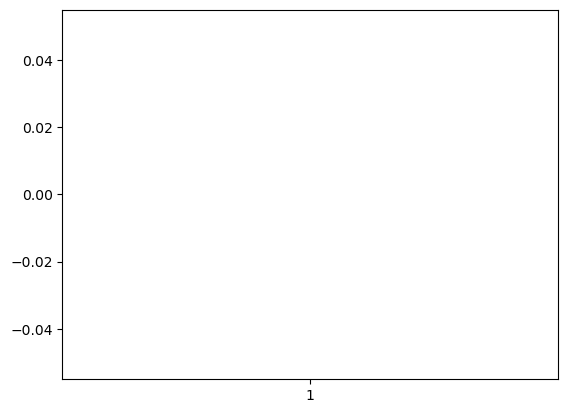

In [486]:
plt.boxplot(applications.OBS_30_CNT_SOCIAL_CIRCLE)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ec496e3ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec496e12b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec496e0230>],
 'medians': [<matplotlib.lines.Line2D at 0x1ec496e0a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ec496e1a00>],
 'means': []}

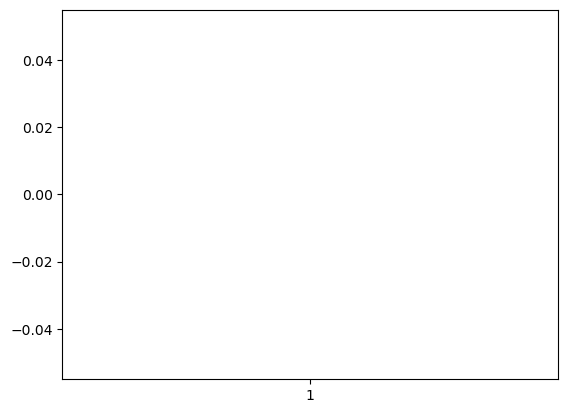

In [488]:
plt.boxplot(applications.DEF_30_CNT_SOCIAL_CIRCLE)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ec5a7c8560>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec5a7c9bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec5a7cae70>],
 'medians': [<matplotlib.lines.Line2D at 0x1ec5a7c8500>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ec5a7c8da0>],
 'means': []}

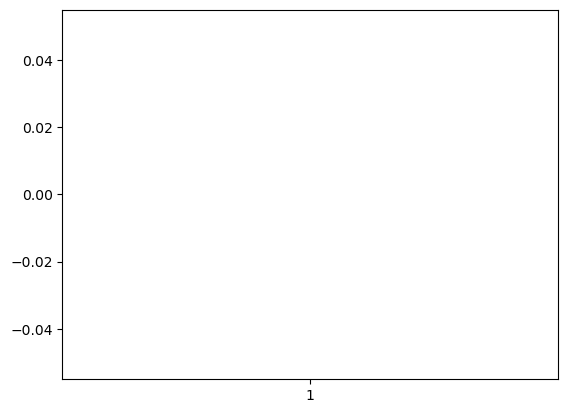

In [210]:
plt.boxplot(df1.DEF_60_CNT_SOCIAL_CIRCLE)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ec3d7e2c00>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec465add30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec3d7e0da0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ec465ad670>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ec465afe60>],
 'means': []}

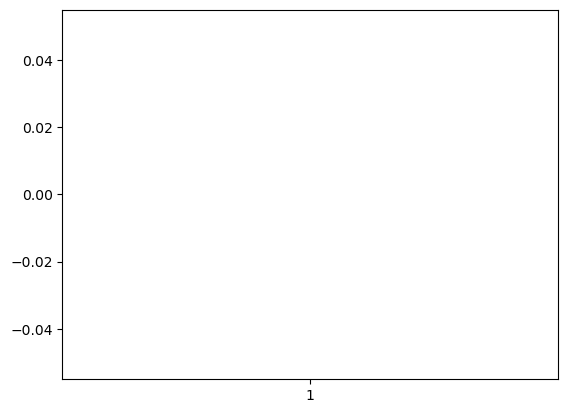

In [490]:
plt.boxplot(applications.OBS_60_CNT_SOCIAL_CIRCLE)

In [492]:
# Imputing missing values with median
applications['OBS_30_CNT_SOCIAL_CIRCLE'] = applications['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(applications['OBS_30_CNT_SOCIAL_CIRCLE'].median())

In [494]:
applications['DEF_30_CNT_SOCIAL_CIRCLE'] = applications['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(applications['DEF_30_CNT_SOCIAL_CIRCLE'].median())

In [496]:
applications['DEF_60_CNT_SOCIAL_CIRCLE'] = applications['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(applications['DEF_60_CNT_SOCIAL_CIRCLE'].median())

In [498]:
applications['OBS_60_CNT_SOCIAL_CIRCLE'] = applications['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(applications['OBS_60_CNT_SOCIAL_CIRCLE'].median())

In [500]:
applications['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [502]:
applications['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [504]:
applications['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [506]:
applications['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [508]:
(applications.isnull().sum()/len(applications.index))*100

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.00
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OCCUPATION_TYPE                0.00
CNT_FAM_MEMBERS                0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
REG_REGION_NOT_LIVE_REGION     0.00
REG_REGION_NOT_WORK_REGION     0.00
LIVE_REGION_NOT_WORK_REGION 

# Column: 
    AMT_REQ_CREDIT_BUREAU_YEAR,
    AMT_REQ_CREDIT_BUREAU_QRT,
    AMT_REQ_CREDIT_BUREAU_MON,
    AMT_REQ_CREDIT_BUREAU_WEEK,
    AMT_REQ_CREDIT_BUREAU_DAY,
    AMT_REQ_CREDIT_BUREAU_HOUR

- AMT_REQ_CREDIT_BUREAU_YEAR: Number of credit inquiries in the last year (excluding the last 3 months). Reflects credit-seeking behavior over a longer period.       
- AMT_REQ_CREDIT_BUREAU_QRT: Number of credit inquiries in the last 3 months. Indicates recent loan-seeking activity.
- AMT_REQ_CREDIT_BUREAU_MON: Number of credit inquiries in the last month. Shows very recent credit behavior.
- AMT_REQ_CREDIT_BUREAU_WEEK: Number of credit inquiries in the last week. Indicates immediate credit-seeking activity.
- AMT_REQ_CREDIT_BUREAU_DAY: Number of credit inquiries in the last day. Signals urgent financial needs.
- AMT_REQ_CREDIT_BUREAU_HOUR: Number of credit inquiries in the last hour. Rare but indicates extreme urgency.

In [242]:
columns_to_impute = [
    'AMT_REQ_CREDIT_BUREAU_YEAR', 
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR'
]

In [512]:
# Imputing missing values with 0
applications[columns_to_impute] = applications[columns_to_impute].fillna(0)

# Check if imputation was successful
print(applications[columns_to_impute].isnull().sum())

AMT_REQ_CREDIT_BUREAU_YEAR    0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_HOUR    0
dtype: int64


In [514]:
(applications.isnull().sum()/len(applications.index))*100

SK_ID_CURR                    0.00
TARGET                        0.00
NAME_CONTRACT_TYPE            0.00
CODE_GENDER                   0.00
FLAG_OWN_CAR                  0.00
FLAG_OWN_REALTY               0.00
CNT_CHILDREN                  0.00
AMT_INCOME_TOTAL              0.00
AMT_CREDIT                    0.00
AMT_ANNUITY                   0.00
AMT_GOODS_PRICE               0.00
NAME_TYPE_SUITE               0.00
NAME_INCOME_TYPE              0.00
NAME_EDUCATION_TYPE           0.00
NAME_FAMILY_STATUS            0.00
NAME_HOUSING_TYPE             0.00
REGION_POPULATION_RELATIVE    0.00
DAYS_BIRTH                    0.00
DAYS_EMPLOYED                 0.00
DAYS_REGISTRATION             0.00
DAYS_ID_PUBLISH               0.00
OCCUPATION_TYPE               0.00
CNT_FAM_MEMBERS               0.00
WEEKDAY_APPR_PROCESS_START    0.00
HOUR_APPR_PROCESS_START       0.00
REG_REGION_NOT_LIVE_REGION    0.00
REG_REGION_NOT_WORK_REGION    0.00
LIVE_REGION_NOT_WORK_REGION   0.00
REG_CITY_NOT_LIVE_CI

In [516]:
applications['CNT_FAM_MEMBERS']=applications['CNT_FAM_MEMBERS'].fillna(applications['CNT_FAM_MEMBERS'].median())

In [518]:
applications.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU

# Dealing with incorrect/unknown data values

In [263]:
# Analysis of CODE_GENDER columna

df1['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [520]:
# Replacing the 'XNA' values with the demales as majority is females and it won't affect our analysis 
applications.CODE_GENDER.replace(to_replace='XNA',value='F',inplace=True)

C:\Users\prana\AppData\Local\Temp\ipykernel_16160\4099935292.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  applications.CODE_GENDER.replace(to_replace='XNA',value='F',inplace=True)


In [522]:
# Confirming the changes 
applications.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [524]:
 # Now checking the Organization Column 
applications.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [526]:
# As 55374 vales are XNA therefore we have to drop XNA 
applications = applications.drop(applications[applications['ORGANIZATION_TYPE'] == 'XNA'].index, axis=0)

In [528]:
# Now checking ORGANIZATION_TYPE 
applications.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3     

# Creating Bins for the 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [533]:
bins_income = [
    0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000,
    275000, 300000, 325000, 350000, 375000, 400000, 425000, 450000, 450800, 475000, 500000]

slot_income = [
    '0-25000', '25000-50000', '50000-75000', '75000-100000', '100000-125000', '125000-150000',
    '150000-175000', '175000-200000', '200000-225000', '225000-250000', '250000-275000',
    '275000-300000', '300000-325000', '325000-350000', '350000-375000', '375000-400000',
    '400000-425000', '425000-450000', '450000-450800', '450800-475000', '475000-500000']

applications['AMT_INCOME_RANGE'] = pd.cut(
    applications['AMT_INCOME_TOTAL'], bins=bins_income, labels=slot_income, right=False)

# Checking For the Imbalance Ratio

In [536]:
# Having a look at the Target Data 
applications.TARGET.value_counts()

TARGET
0    230302
1     21835
Name: count, dtype: int64

- Here 'TARGET = 0 ' means the people those who are non-defaulters 
- and, 'TARGET = 1' means the people those who are defaulters

C:\Users\prana\AppData\Local\Temp\ipykernel_16160\1585290663.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, 'Count')

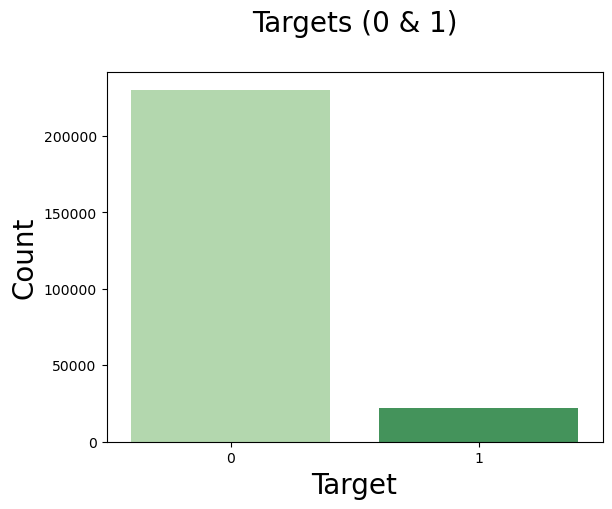

In [541]:
# Plotting for the Targets 

# Use Seaborn's barplot for horizontal bars along the x-axis
sns.barplot(
    x=applications['TARGET'].value_counts().index,
    y=applications['TARGET'].value_counts().values,
    palette='Greens')

# Add title and labels
plt.title('Targets (0 & 1)\n', fontsize=20)
plt.xlabel('Target', fontsize=20)
plt.ylabel('Count', fontsize=20)

In [543]:
# Checking the imbalance ratio for the Target column
target_0 = applications.loc[applications["TARGET"] == 0]
target_1 = applications. loc[applications[ "TARGET" ] == 1]
round(len(target_0)/len(target_1),2) 

10.55

# Univariate Analysis 

#### plotting a bar chart for those having difficulty in repaying the loan i.e the Target = 0 people

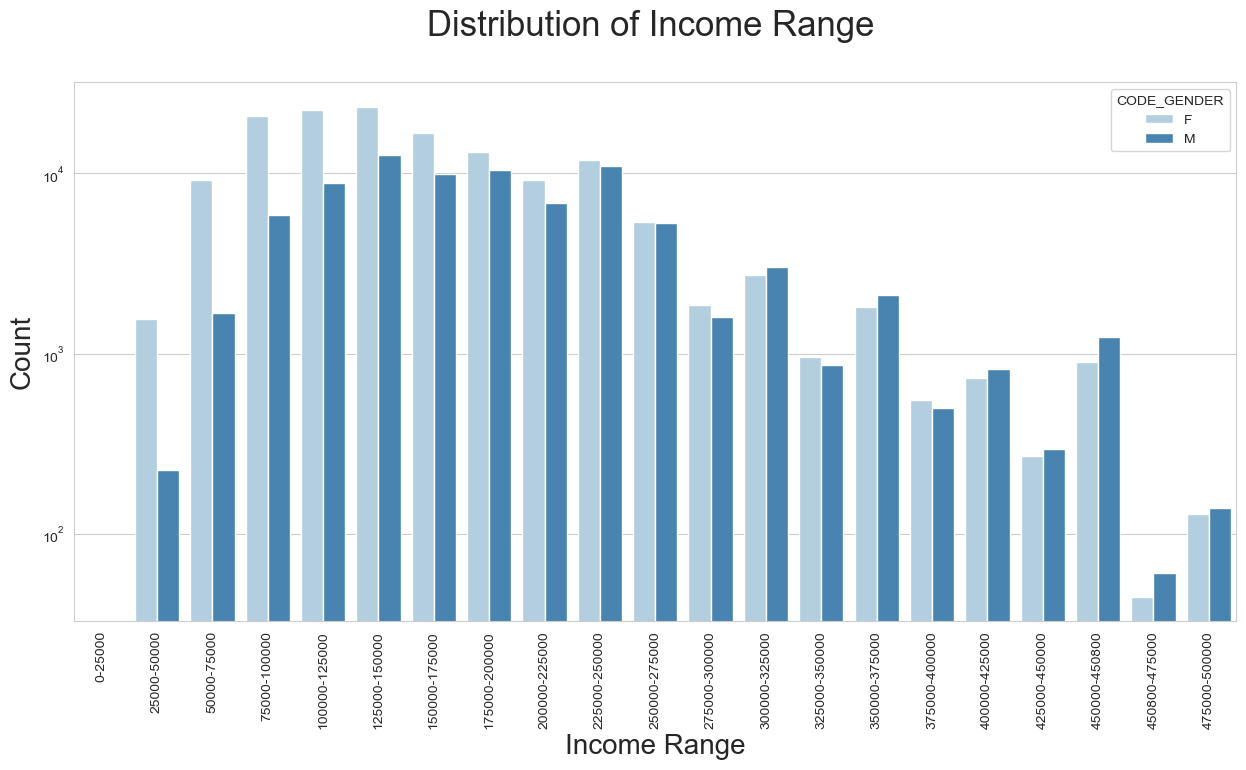

In [547]:
# Plotting for Income Range across various Gender.
plt.figure(figsize=[15,7])
sns.set_style('whitegrid')
sns.countplot(data=target_0, x='AMT_INCOME_RANGE', hue='CODE_GENDER', palette='Blues')
plt.xticks(rotation=90)
plt. title('Distribution of Income Range \n', fontsize=25)
plt.xlabel('Income Range', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')
plt.show()

# Conclusions From the Graph : 
- income Range from 125000 to 150000 is having more number of Credits
- Very Less Counts From Range 40800 to 475000
- it seems that the females are more than male in having cfor range 12500 to 325000

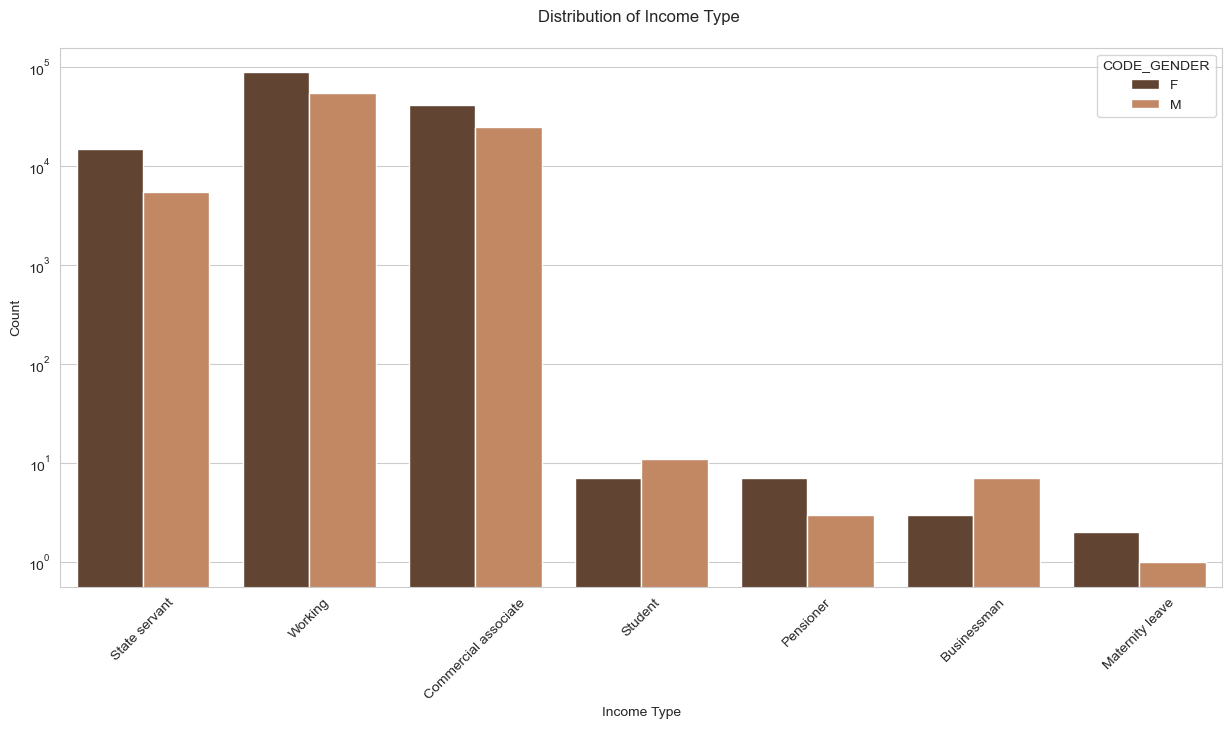

In [561]:
# Plotting for the various Income types across various Gender.

plt.figure(figsize=[15,7])


sns.countplot(data=target_0, x='NAME_INCOME_TYPE', hue='CODE_GENDER', palette='copper')

plt.xticks(rotation=45)
plt.title('Distribution of Income Type \n')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.yscale('log')

plt.show()

# Conclusion from the graph:

1. It seems that working women have most credit than others.
2. It seems that 'State Servant',"Working' and 'Commercial Associate'have more credit counts compared to others.
3. It seems Women in 'Maternity leave' has less credit in comparison to others.

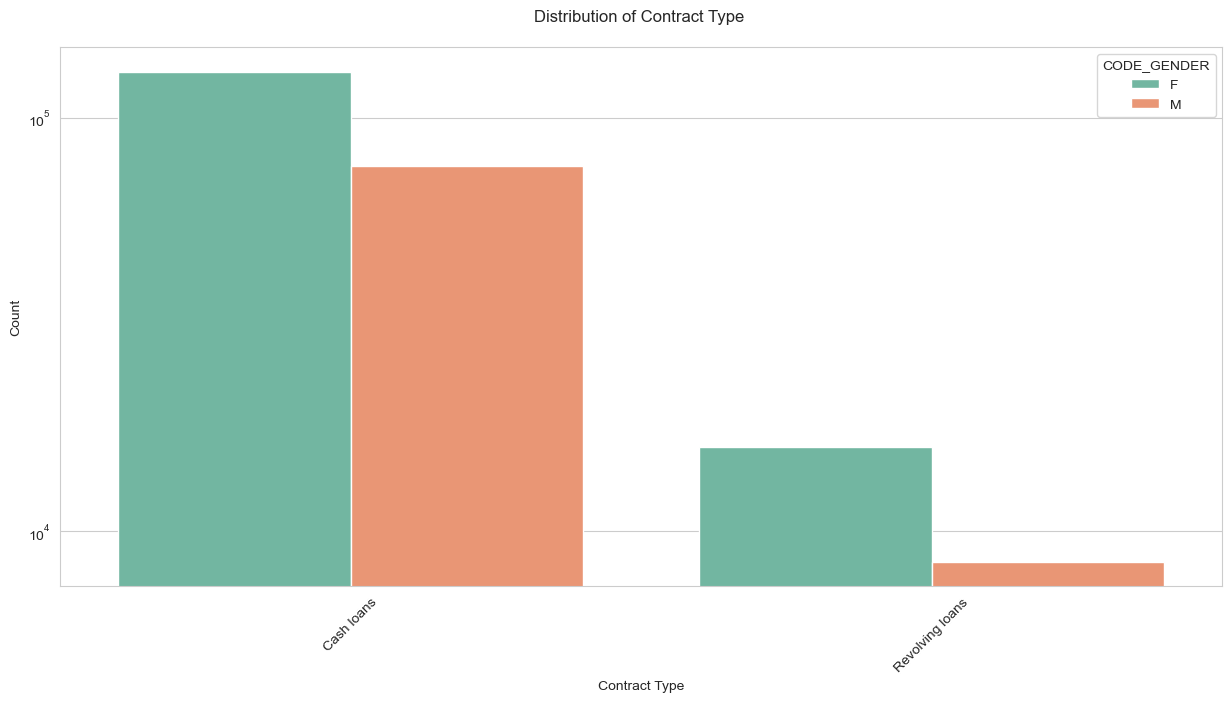

In [555]:
# Plotting for the Contract type across various Genders.

plt.figure(figsize=[15,7])
sns.set_style('whitegrid')

sns.countplot(data=target_0, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', palette='Set2')

plt.xticks(rotation=45)
plt.title('Distribution of Contract Type \n')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.yscale('log')

plt.show()

# Conclusion from the graph:

1. It seems that cash loans' is having higher number of credits than 'Revolving loans" contract type.
2. Also, female applies more for Credit.

# Plotting For Those having difficulty in repaying the loan i.e TARGET 1 People 

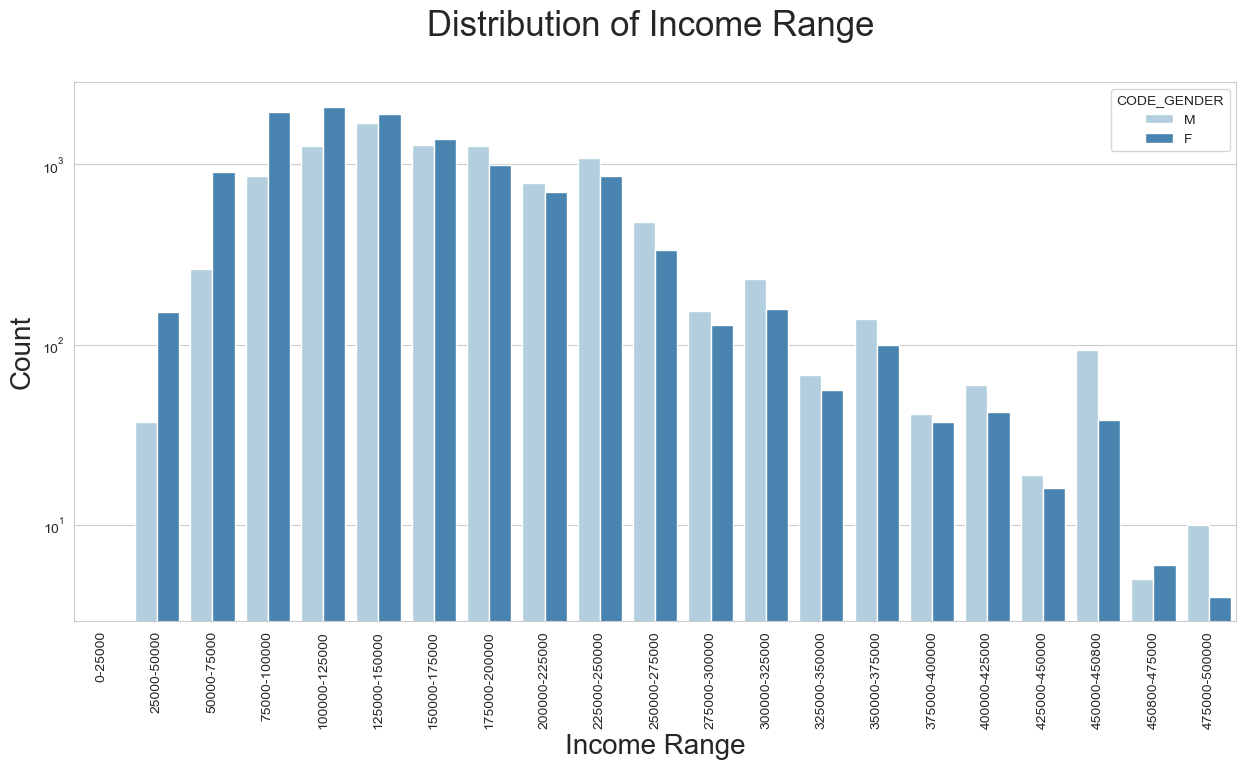

In [651]:
# Plotting for Income Range across various Gender.

plt.figure(figsize=[15,7])
sns.set_style('whitegrid')

sns.countplot(data=target_1, x='AMT_INCOME_RANGE', hue='CODE_GENDER', palette='Blues')

plt.xticks(rotation=90)
plt.title('Distribution of Income Range \n', fontsize=25)
plt.xlabel('Income Range', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')

plt.show()

# Conclusions from the graph:

1. Male Counts are higher.
2. Income range from 100000 to 200000 is having more number of credits.
3. Less count for income range 450000-475000.

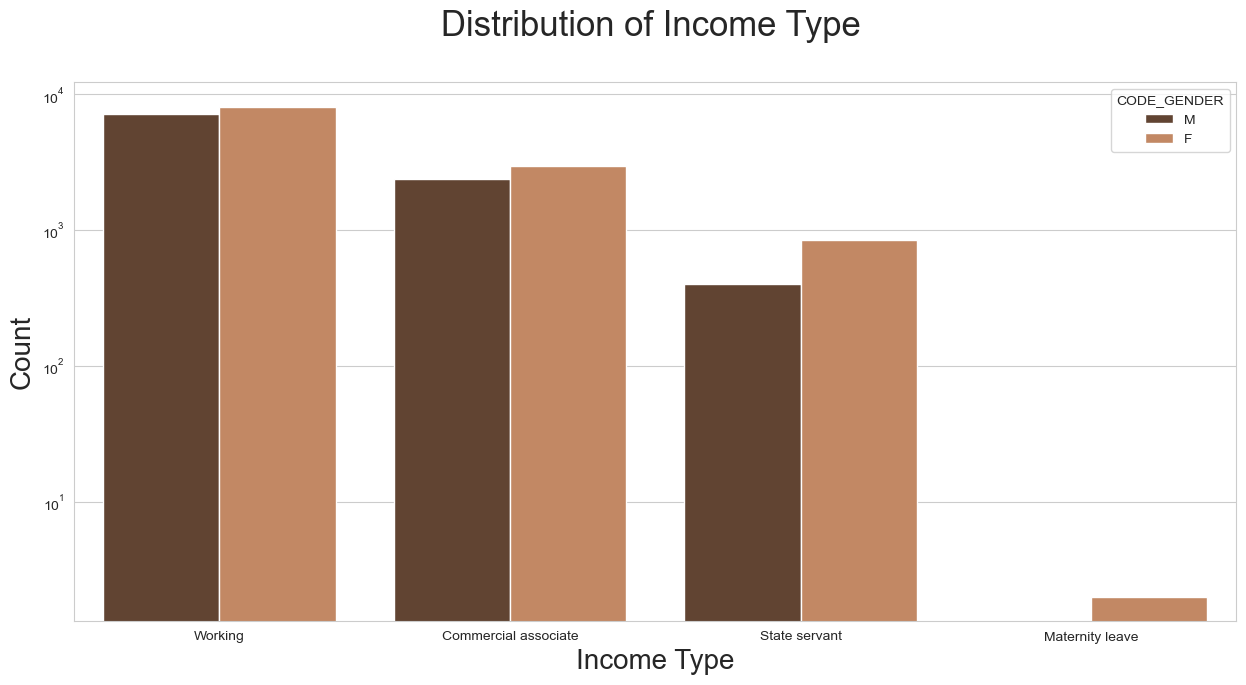

In [653]:
# Plotting for the various Income types across various Gender.

plt.figure(figsize=[15,7])
sns.set_style('whitegrid')

sns.countplot(data=target_1, x='NAME_INCOME_TYPE', hue='CODE_GENDER', palette='copper')

plt.title('Distribution of Income Type \n', fontsize=25)
plt.xlabel('Income Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')

plt.show()

# Conclusions from the graph:

1. For income type 'working', 'commercial associate", and 'State Servant' the number of credits are higher than other i.e. 'Maternity leave.
2. For this Females are having more number of credits than male.
3. Less number of credits for income type 'Matemity leave'.

# Bivariate Analysis of the numerical columns

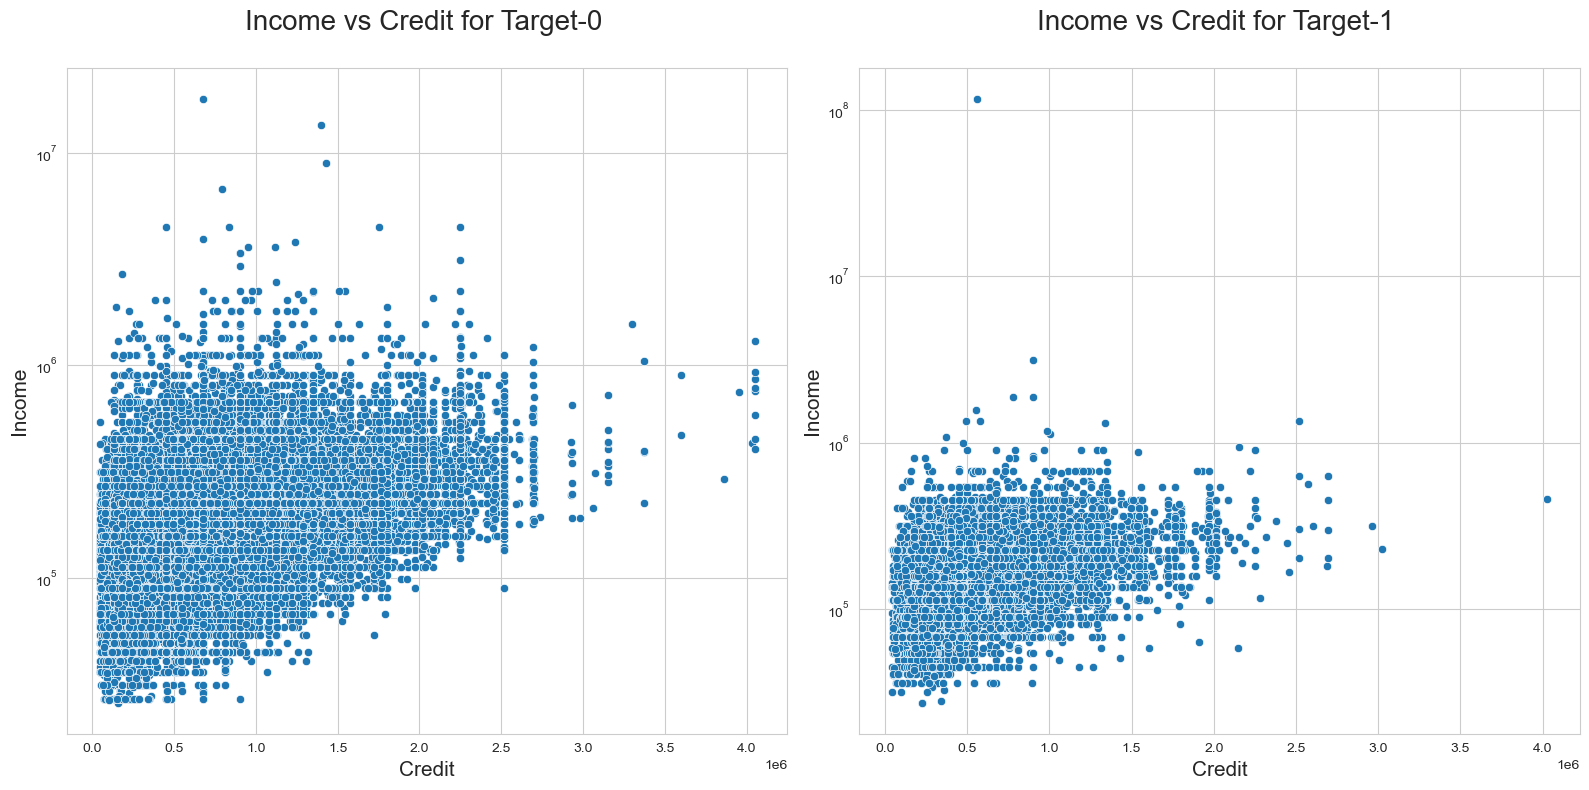

In [655]:
# Plotting scatterplot to find any correlations and to check the trends in the dataset, in logs,

plt.figure(figsize=[16, 8])

# Plot for Target-0
plt.subplot(1, 2, 1)
sns.scatterplot(x=target_0['AMT_CREDIT'], y=target_0['AMT_INCOME_TOTAL'])
plt.title('Income vs Credit for Target-0 \n', fontsize=20)
plt.yscale('log')
plt.xlabel('Credit', fontsize=15)
plt.ylabel('Income', fontsize=15)

# Plot for Target-1
plt.subplot(1, 2, 2)
sns.scatterplot(x=target_1['AMT_CREDIT'], y=target_1['AMT_INCOME_TOTAL'])
plt.title('Income vs Credit for Target-1 \n', fontsize=20)
plt.yscale('log')
plt.xlabel('Credit', fontsize=15)
plt.ylabel('Income', fontsize=15)

# Display the plots
plt.tight_layout()
plt.show()


# Conclusions from the graph:
- With the scatter plot,we can determine that AMT CREDIT and AMT GOODS PRICE are highly correlated,which means
if increase in goods price,the credit increased directly and vice versa.

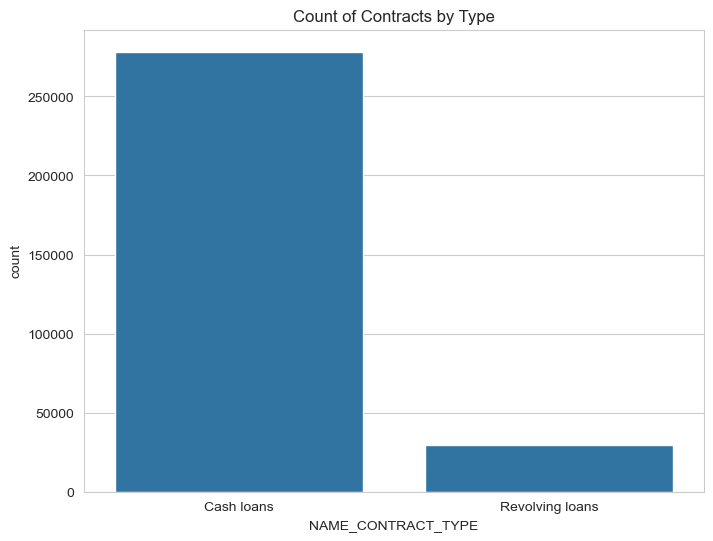

In [635]:
# Count Plot: NAME_CONTRACT_TYPE
plt.figure(figsize=(8,6))
sns.countplot(x='NAME_CONTRACT_TYPE', data=df1)
plt.title("Count of Contracts by Type")
plt.show()

# Conclusion

- Gender Insights: Female customers have a lower default rate compared to males, and they are more likely to take loans in the given credit range.

- Safer Customer Segments: Safer groups for loans include individuals who are employed (working professionals, commercial associates, pensioners, and state servants), those with higher or secondary education, married individuals, and those owning houses or apartments.

- Risky Segments: Unemployed individuals, those on maternity leave, drivers, and low-skill laborers are more likely to default. Customers taking cash loans also show a higher likelihood of default.

- Loan Repayment Trends: Unaccompanied individuals and families have taken and successfully repaid the most loans, with most loans being in the range of 0 to 1 million and annuities paid between 0 to 1 lakh.
